# Character-Assisted Music Listening 통계 분석

#### 변수
- 독립변수: 기쁨음악/슬픔음악, 캐릭터집단/비캐릭터집단/무표정캐릭터집단
- 종속변수: HScore (기쁨 변화), SScore (슬픔 변화), music (음악 감정)

#### 분석 요약
1. 기술분석
2. T-test 분석 (캐릭터/음악 4개 집단): 음악 집단(슬픔, 기쁨 음악) 에 대한 기쁨 변화량, 슬픔 변화량 차이만 있었음
3. 선형회귀분석 (캐릭터/음악 4개 집단): T-test 분석결과와 같았음
4. ANOVA 분석 (기쁨 음악 3개 집단): 캐릭터에 대한 효과 없었음

In [2]:
# install.packages("psych")
library(psych)
data <- read.csv("Quant-s.csv")

In [55]:
levels(data$WithChar) <- c("WithChar", "WithoutChar", "WithChar-NoExp")
data$WithChar <- as.factor(data$WithChar)
data$Happiness <- as.factor(data$Happiness)
multittest <- data[which(data$WithChar!='WithChar-NoExp'),]

# head(data)
# str(data)

## 1. 기술 분석

- 기쁨 음악
    - 기쁨 변화량 평균 (캐릭터 집단 2.0425 > 비캐릭터 집단 1.0975 > 무표정캐릭터 집단 0.5500)
    - 슬픔 변화량 평균 (캐릭터 집단 -0.4575 > 무표정캐릭터 집단 -1.8000 > 비캐릭터 집단 -2.1525)
    - 음악 감정 평균 (캐릭터 집단 11.3775 > 비캐릭터 집단 10.0975 > 무표정캐릭터 집단 9.9975)


- 슬픔 음악
    - 기쁨 변화량 평균 (비캐릭터 집단 -1.3375 > 캐릭터 집단 -1.1650)
    - 슬픔 변화량 평균 (캐릭터 집단 -3.8150 > 비캐릭터 집단 -4.0375)
    - 음악 감정 평균 (비캐릭터 집단 10.7100 > 캐릭터 집단 10.4850)

In [27]:
happymusic <- data[which(data$Happiness == 1), ]
#head(happymusic)

sadmusic <- data[which(data$Happiness == 0), ]
#head(sadmusic)

describeBy(list(happymusic$Hscore, happymusic$Sscore, happymusic$music), group = happymusic$WithChar, mat = T)
describeBy(list(sadmusic$Hscore, sadmusic$Sscore, sadmusic$music), group = sadmusic$WithChar, mat = T)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
c.2.5..0.2...10.3..0..2.9..2.55..1.55..1.8...3.4..2.1..0.65..1,1,0,1,20,2.0425,3.542645,1.775,2.178125,2.409225,-8.1,8.5,16.6,-0.654345984,1.33703231,0.7921596
c.2.5..0.2...10.3..0..2.9..2.55..1.55..1.8...3.4..2.1..0.65..2,2,1,1,20,1.0975,3.412842,1.675,1.540625,1.667925,-10.3,5.8,16.1,-1.747625242,3.71784431,0.7631348
c.2.5..0.2...10.3..0..2.9..2.55..1.55..1.8...3.4..2.1..0.65..3,3,2,1,20,0.5500,2.884988,0.700,0.493750,1.742055,-5.7,6.7,12.4,0.006634124,-0.05605319,0.6451030
c..0.5...3.8...13.3...3...0.1...0.45...0.45...1.2...7.4..0.1..1,4,0,2,20,-0.4575,3.000933,0.025,-0.134375,1.556730,-9.1,4.1,13.2,-1.154467440,1.39228081,0.6710290
c..0.5...3.8...13.3...3...0.1...0.45...0.45...1.2...7.4..0.1..2,5,1,2,20,-2.1525,3.654322,-1.525,-1.771875,2.186835,-13.3,3.8,17.1,-1.276141109,2.08586261,0.8171313
c..0.5...3.8...13.3...3...0.1...0.45...0.45...1.2...7.4..0.1..3,6,2,2,20,-1.8000,3.047777,-2.025,-1.943750,1.482600,-7.7,4.7,12.4,0.432192566,0.05554073,0.6815038
c.14.4..15..7.8..2.3..11.65..11.25..11.9..11.3..8..8.9..4.35..1,7,0,3,20,11.3775,2.168645,11.525,11.515625,1.964445,5.5,15.0,9.5,-0.743126131,0.61215302,0.4849237
c.14.4..15..7.8..2.3..11.65..11.25..11.9..11.3..8..8.9..4.35..2,8,1,3,20,10.0975,3.820288,11.275,10.418750,3.595305,2.3,15.0,12.7,-0.671813987,-0.83911692,0.8542423
c.14.4..15..7.8..2.3..11.65..11.25..11.9..11.3..8..8.9..4.35..3,9,2,3,20,9.9975,3.474966,10.575,10.443750,2.705745,0.5,15.0,14.5,-1.098900196,0.71080834,0.7770260


,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
c..6.3..0...1.25..3.2...3.6...1.3..0..3.95...2.8..0...4.35...1.75..1,1,0,1,20,-1.1650,2.711093,-0.900,-1.037500,1.482600,-8.50,4.70,13.20,-0.57807613,1.1076894,0.6062189
c..6.3..0...1.25..3.2...3.6...1.3..0..3.95...2.8..0...4.35...1.75..2,2,1,1,20,-1.3375,3.413706,-1.125,-1.353125,2.742810,-8.55,5.80,14.35,0.04418232,-0.2722632,0.7633279
c..6.3..0...1.25..3.2...3.6...1.3..0..3.95...2.8..0...4.35...1.75..3,3,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
c..9.3...1...3.25..2.2...7.6...2.3...2..2.95...6.8...3...8.35..1,4,0,2,20,-3.8150,2.968346,-3.575,-3.715625,1.519665,-10.50,2.70,13.20,-0.21919066,0.1744793,0.6637424
c..9.3...1...3.25..2.2...7.6...2.3...2..2.95...6.8...3...8.35..2,5,1,2,20,-4.0375,3.688991,-4.050,-4.190625,3.780630,-9.55,2.95,12.50,0.32271869,-0.9576294,0.8248834
c..9.3...1...3.25..2.2...7.6...2.3...2..2.95...6.8...3...8.35..3,6,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
c.11.3..10.5..11.5..8.8..8.7..9.6..9..9.5..11.5..13.2..7.3..11.9..1,7,0,3,20,10.4850,3.431016,11.050,10.781250,2.928135,2.00,15.00,13.00,-0.77343775,-0.1878856,0.7671984
c.11.3..10.5..11.5..8.8..8.7..9.6..9..9.5..11.5..13.2..7.3..11.9..2,8,1,3,20,10.7100,1.537993,11.125,10.721875,1.149015,7.30,13.45,6.15,-0.29162054,-0.5164467,0.3439056
c.11.3..10.5..11.5..8.8..8.7..9.6..9..9.5..11.5..13.2..7.3..11.9..3,9,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA



## 2. 독립 T-test (무표정 캐릭터 집단 제외 4개 집단)

#### 슬픔/기쁨 음악 집단, 캐릭터/비캐릭터 집단을 각각 비교해봤을 때,
 - 음악 감정, 기쁨 변화량, 슬픔 변화량
     - 유의미한 p-value 값은 음악 집단별 기쁨 변화량, 슬픔 변화량만 나옴 (캐릭터 집단 고려하지 않은 것)

In [47]:
# 음악 감정: Happy Music - Sad Music
t_data_1 <- t.test(multittest$music[which(multittest$Happiness == 0)], multittest$music[which(multittest$Happiness == 1)])
t_data_1$p.value

# 음악 감정: Character - No-Character
t_data_3 <- t.test(multittest$music[which(multittest$WithChar == "WithChar")], multittest$music[which(multittest$WithChar == "WithoutChar")])
t_data_3$p.value

# 기쁨 변화량: Happy Music - Sad Music
t_data_2 <- t.test(multittest$Hscore[which(multittest$Happiness == 0)], multittest$Hscore[which(multittest$Happiness == 1)])
t_data_2$p.value

# 기쁨 변화량: Character - No-Character
t_data_4 <- t.test(multittest$Hscore[which(multittest$WithChar == "WithChar")], multittest$Hscore[which(multittest$WithChar == "WithoutChar")])
t_data_4$p.value

# 슬픔 변화량: Happy Music - Sad Music
t_data_5 <- t.test(multittest$Sscore[which(multittest$Happiness == 0)], multittest$Sscore[which(multittest$Happiness == 1)])
t_data_5$p.value

# 슬픔 변화량: Character - No-Character
t_data_6 <- t.test(multittest$Sscore[which(multittest$WithChar == "WithChar")], multittest$Sscore[which(multittest$WithChar == "WithoutChar")])
t_data_6$p.value

[1] 0.8291582

[1] 0.4152227

[1] 0.0002287648

[1] 0.4835993

[1] 0.000798231

[1] 0.2345644

## 3. 선형회귀분석 (무표정 캐릭터 집단 제외 4개 집단)

#### 음악 감정, 기쁨 변화량, 슬픔 변화량을 비교해봤을 때,
    - 역시 여기서도 유의미한 p-value 값은 음악 집단별 기쁨 변화량, 슬픔 변화량 = 기쁨 음악 집단에서 더 높은 기쁨 변화량, 슬픔 음악 집단에서 더 높은 슬픔 변화량
    - (Intercept)도 유의미한 p-value 값을 가지나, 여기서는 중요하지 않은 값임 (독립변수들이 0일 때 효과를 측정한 것)

In [52]:
t_data_5 <- lm(Hscore ~ WithChar + Happiness + WithChar * Happiness, data = multittest)
summary(t_data_5)

t_data_6 <- lm(Sscore ~ WithChar + Happiness + WithChar * Happiness, data = multittest)
summary(t_data_6)

t_data_7 <- lm(music ~ WithChar + Happiness + WithChar * Happiness, data = multittest)
summary(t_data_7)


Call:
lm(formula = Hscore ~ WithChar + Happiness + WithChar * Happiness, 
    data = multittest)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.398  -1.217   0.195   1.415   7.138 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                     -1.1650     0.7349  -1.585  0.11704   
WithCharWithoutChar             -0.1725     1.0392  -0.166  0.86861   
Happiness1                       3.2075     1.0392   3.086  0.00283 **
WithCharWithoutChar:Happiness1  -0.7725     1.4697  -0.526  0.60069   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.286 on 76 degrees of freedom
Multiple R-squared:  0.1702,	Adjusted R-squared:  0.1375 
F-statistic: 5.198 on 3 and 76 DF,  p-value: 0.002554



Call:
lm(formula = Sscore ~ WithChar + Happiness + WithChar * Happiness, 
    data = multittest)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1475  -1.4781   0.2838   1.7662   6.9875 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -3.8150     0.7482  -5.099 2.43e-06 ***
WithCharWithoutChar             -0.2225     1.0581  -0.210  0.83400    
Happiness1                       3.3575     1.0581   3.173  0.00218 ** 
WithCharWithoutChar:Happiness1  -1.4725     1.4963  -0.984  0.32820    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.346 on 76 degrees of freedom
Multiple R-squared:  0.1638,	Adjusted R-squared:  0.1308 
F-statistic: 4.962 on 3 and 76 DF,  p-value: 0.003372



Call:
lm(formula = music ~ WithChar + Happiness + WithChar * Happiness, 
    data = multittest)

Residuals:
   Min     1Q Median     3Q    Max 
-8.485 -1.201  0.465  1.593  4.902 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     10.4850     0.6465  16.219   <2e-16 ***
WithCharWithoutChar              0.2250     0.9143   0.246    0.806    
Happiness1                       0.8925     0.9143   0.976    0.332    
WithCharWithoutChar:Happiness1  -1.5050     1.2930  -1.164    0.248    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.891 on 76 degrees of freedom
Multiple R-squared:  0.02648,	Adjusted R-squared:  -0.01194 
F-statistic: 0.6892 on 3 and 76 DF,  p-value: 0.5614


## 4. ANOVA (기쁨 음악 3개 집단)

#### 음악 감정, 기쁨 변화량, 슬픔 변화량을 비교해봤을 때,
    - 유의미한 p-value 값 없었음

            Df Sum Sq Mean Sq F value Pr(>F)
WithChar     2   22.8   11.40   1.052  0.356
Residuals   57  617.9   10.84               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Hscore ~ WithChar, data = happymusic)

$WithChar
                              diff       lwr      upr     p adj
WithoutChar-WithChar       -0.9450 -3.450488 1.560488 0.6377438
WithChar-NoExp-WithChar    -1.4925 -3.997988 1.012988 0.3307510
WithChar-NoExp-WithoutChar -0.5475 -3.052988 1.957988 0.8590261


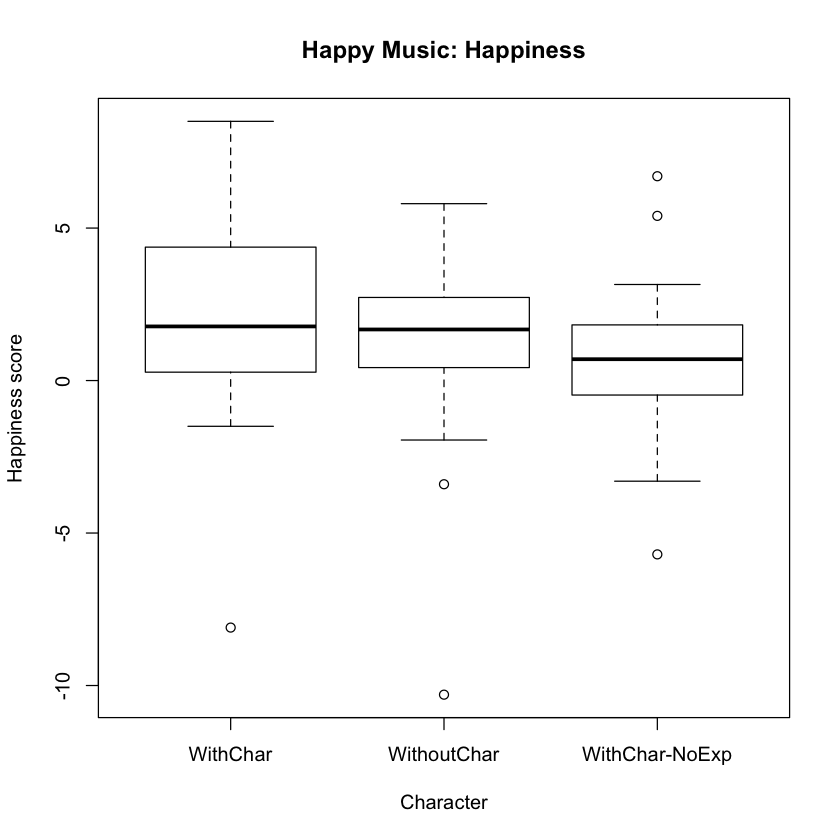

In [216]:
anova_data_1 <- aov(Hscore ~ WithChar, data = happymusic)
summary(anova_data_1)
TukeyHSD(anova_data_1)
boxplot(Hscore ~ WithChar, data = happymusic, xlab = "Character", ylab = "Happiness score", main = "Happy Music: Happiness")

            Df Sum Sq Mean Sq F value Pr(>F)
WithChar     2   32.0   16.00   1.517  0.228
Residuals   57  601.3   10.55               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sscore ~ WithChar, data = happymusic)

$WithChar
       diff       lwr      upr     p adj
1-0 -1.6950 -4.166655 0.776655 0.2332926
2-0 -1.3425 -3.814155 1.129155 0.3971479
2-1  0.3525 -2.119155 2.824155 0.9372109


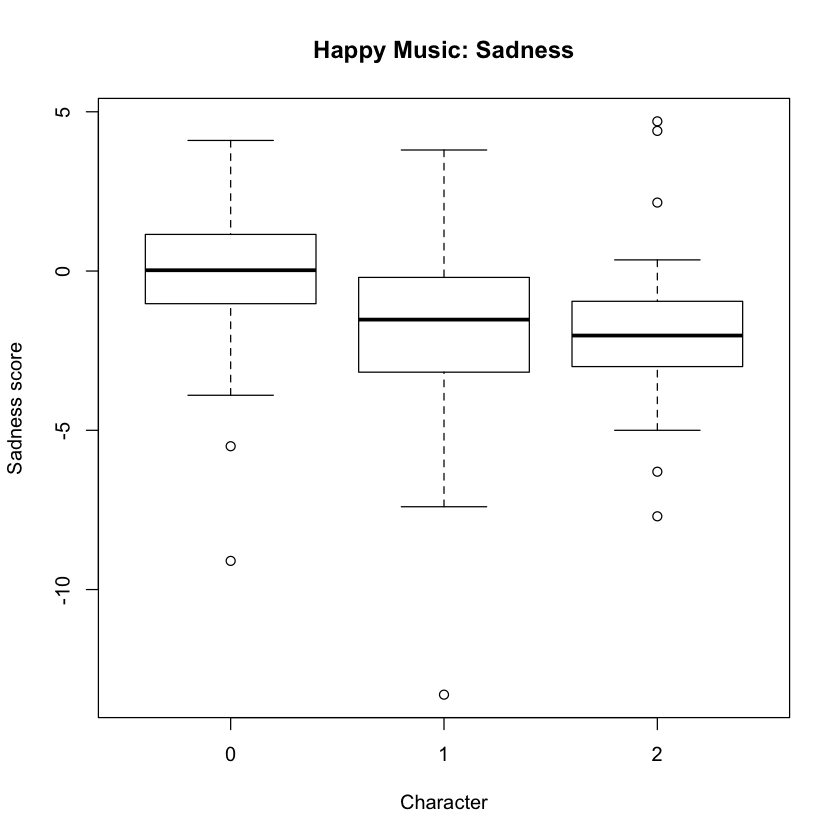

In [54]:
anova_data_1 <- aov(Sscore ~ WithChar, data = happymusic)
summary(anova_data_1)
TukeyHSD(anova_data_1)
boxplot(Sscore ~ WithChar, data = happymusic, xlab = "Character", ylab = "Sadness score", main = "Happy Music: Sadness")

            Df Sum Sq Mean Sq F value Pr(>F)
WithChar     2   23.7   11.84   1.132  0.329
Residuals   57  596.1   10.46               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = music ~ WithChar, data = happymusic)

$WithChar
                            diff       lwr      upr     p adj
WithoutChar-WithChar       -1.28 -3.740869 1.180869 0.4281839
WithChar-NoExp-WithChar    -1.38 -3.840869 1.080869 0.3741583
WithChar-NoExp-WithoutChar -0.10 -2.560869 2.360869 0.9947425


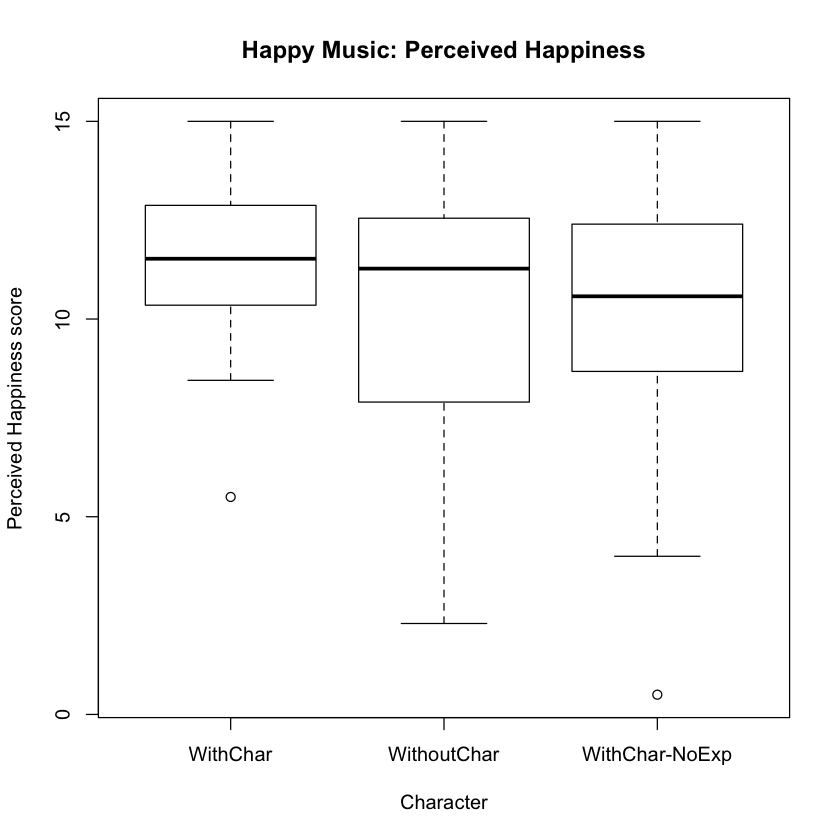

In [217]:
anova_data_2 <- aov(music ~ WithChar, data = happymusic)
summary(anova_data_2)
TukeyHSD(anova_data_2)
boxplot(music ~ WithChar, data = happymusic, xlab = "Character", ylab = "Perceived Happiness score", main = "Happy Music: Perceived Happiness")